<a href="https://colab.research.google.com/github/MatheusrCunha/PDS_1/blob/main/An%C3%A1lise_tempo_frequ%C3%AAncia_e_janelamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

Gerando um sinal de teste senoidal com ruído aditivo gaussiano com desvio padrão 0.25 e média 0:



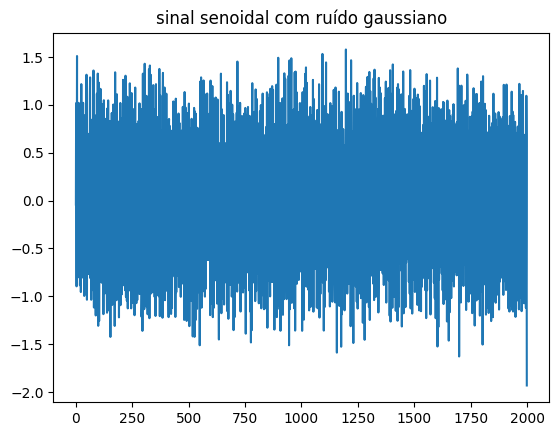

In [ ]:
Fs = 4000 # taxa de amostragem
freq = 1040
freq_discr = freq/Fs
d = 0.5 # duração em segundos
N = np.round(d * Fs).astype(int) # número de amostras
n = np.arange(0,N) # índice amostral
sinal = np.sin(2*np.pi*freq_discr*n) + np.random.normal(0, 0.25, N)
plt.plot(n, sinal)
plt.title('sinal senoidal com ruído gaussiano')
plt.axis('tight')
plt.show()

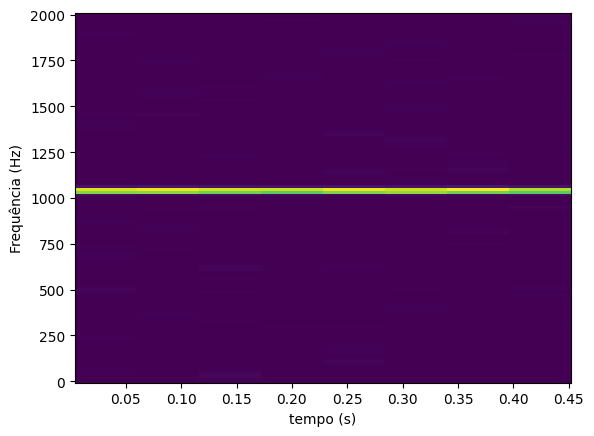

In [ ]:
freq,tempo,potencia = signal.spectrogram(sinal,Fs,window='hann')
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html
plt.pcolormesh(tempo,freq,potencia)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

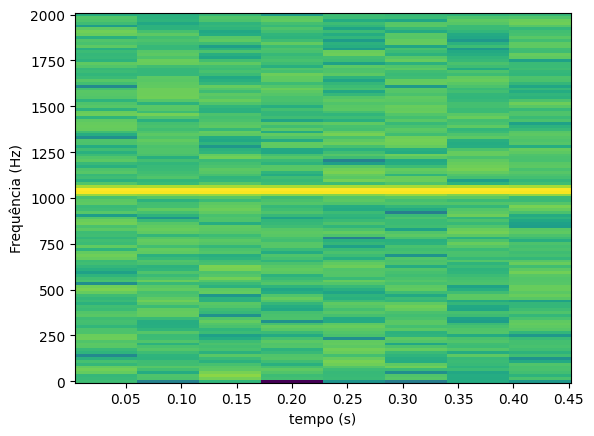

In [ ]:
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

Adicionando um impulso em 0,22s.

Text(0.5, 1.0, 'trecho de função impulso')

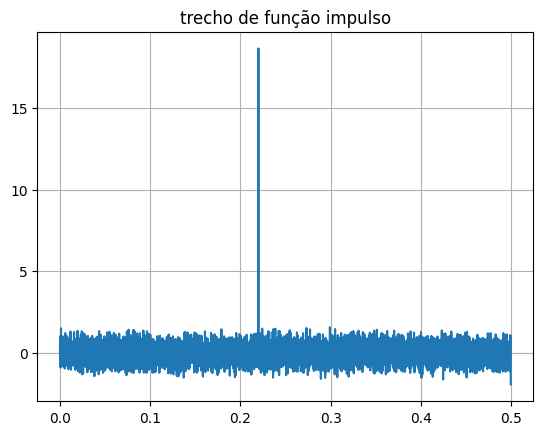

In [ ]:
clique = signal.unit_impulse(N,np.round(0.22*Fs).astype(int)) # criando um sinal de impulso em 0,22s
sinal_com_clique = sinal+20*clique
plt.figure()
plt.grid()
plt.plot(n/Fs,sinal_com_clique)
plt.title('trecho de função impulso')


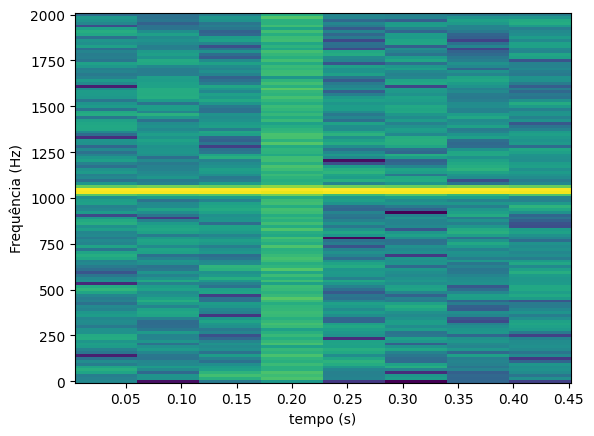

In [ ]:
freq,tempo,potencia = signal.spectrogram(sinal_com_clique,Fs,window='hann') # blocos de 256 mostras com superposição de 32 amostras
max_pot = np.max(potencia)
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

Fazendo mais superposição entre blocos:

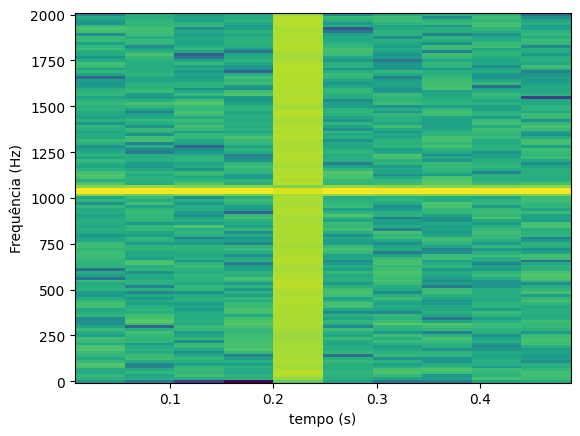

In [ ]:
freq,tempo,potencia = signal.spectrogram(sinal_com_clique,Fs,'hann',256,64) # blocos de 256 mostras com superposição de 64 amostras
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

Diminuindo a razão sinal/ruído:

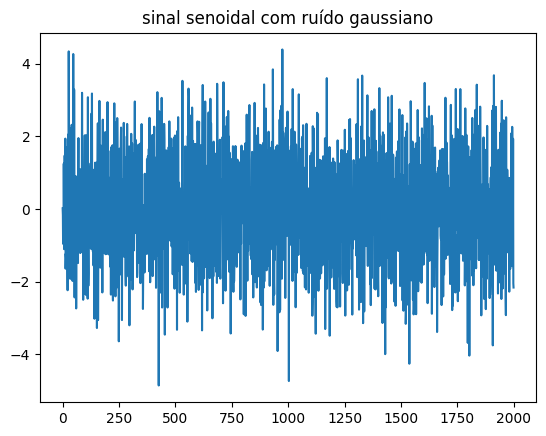

In [ ]:
Fs = 4000 # taxa de amostragem
freq = 1040
freq_discr = freq/Fs
d = 0.5 # duração em segundos
N = np.round(d * Fs).astype(int) # número de amostras
n = np.arange(0,N) # índice amostral
sinal_mais_ruidoso = np.sin(2*np.pi*freq_discr*n) + 5*np.random.normal(0, 0.25, N)
plt.plot(n, sinal_mais_ruidoso)
plt.title('sinal senoidal com ruído gaussiano')
plt.axis('tight')
plt.show()

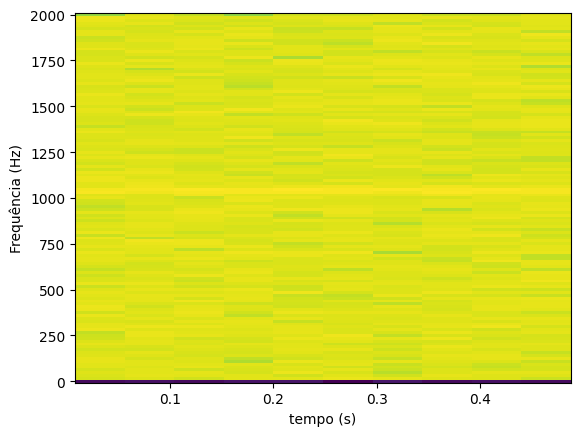

In [ ]:
freq,tempo,potencia = signal.spectrogram(sinal_mais_ruidoso,Fs,'rect',256,64) # blocos de 256 mostras com superposição de 64 amostras
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

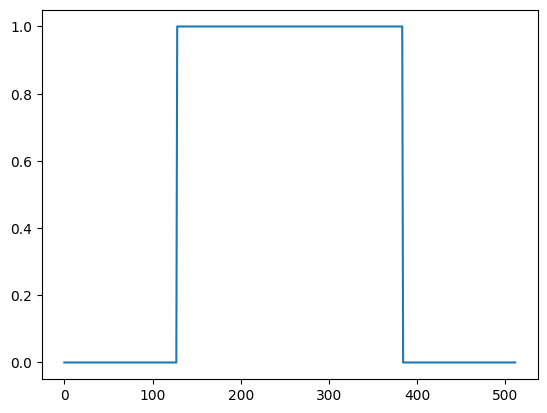

In [ ]:
window = np.zeros(512)
window[128:384] = np.ones(256);
plt.plot(window)

Text(0.5, 1.0, 'Espectro de magnitude da janela retangular')

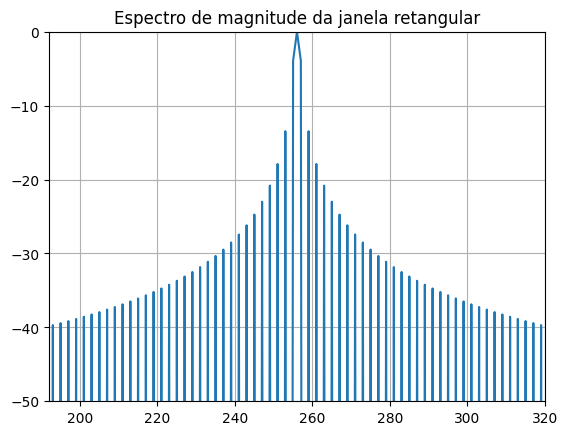

In [ ]:
plt.figure()
X_window = np.fft.fft(window,len(window))
mag_espectro = np.abs(X_window)+10**(-16)*np.ones(512)
mag_espectro_dB = 20*np.log10(mag_espectro/np.max(mag_espectro))
plt.plot(np.fft.fftshift(mag_espectro_dB))
plt.grid()
plt.axis([192, 320, -50, 0])
plt.title('Espectro de magnitude da janela retangular')

Text(0.5, 0, 'amostras')

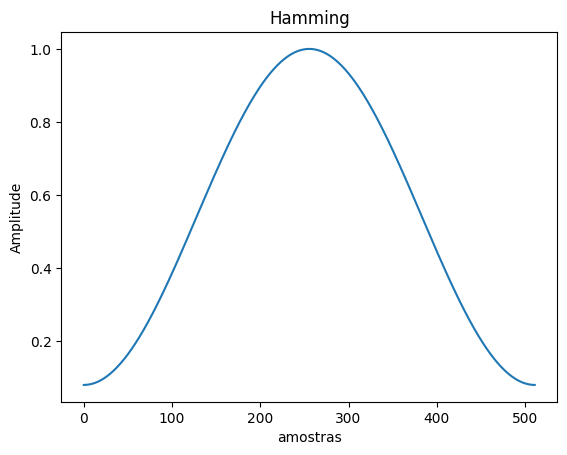

In [ ]:
janela = signal.windows.hamming(512)
plt.plot(janela)
plt.title("Hamming")
plt.ylabel("Amplitude")
plt.xlabel("amostras")

Text(0.5, 1.0, 'Espectro de magnitude da janela retangular')

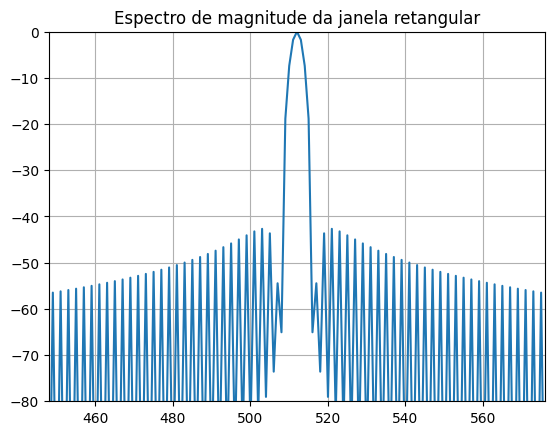

In [ ]:
plt.figure()
X_janela = np.fft.fft(janela,1024)
mag_espectro = np.abs(X_janela)
mag_espectro_dB = 20*np.log10(mag_espectro/np.max(mag_espectro))
plt.plot(np.fft.fftshift(mag_espectro_dB))
plt.grid()
plt.axis([448, 576, -80, 0])
plt.title('Espectro de magnitude da janela retangular')

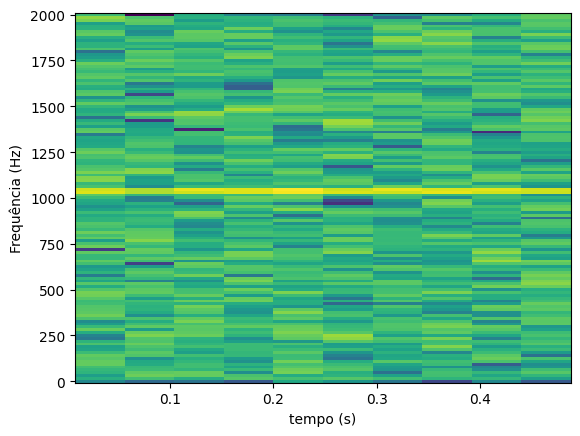

In [ ]:
freq,tempo,potencia = signal.spectrogram(sinal_mais_ruidoso,Fs,'hamming',256,64) # blocos de 256 mostras com superposição de 64 amostras
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

In [ ]:
# Importando o arquivo de áudio
from google.colab import files
uploaded = files.upload()

In [ ]:
from scipy.io.wavfile import read, write
Fs, sinal_audio = read('7eleven - Dance The Slurp.wav')
sinal_audio = sinal_audio[44100:88200,0] # o sinal original é estéreo, mas só queremos um canal.
sinal_audio_norm = sinal_audio/(2**15) # Obs. Normalização para sinal de 16 bits

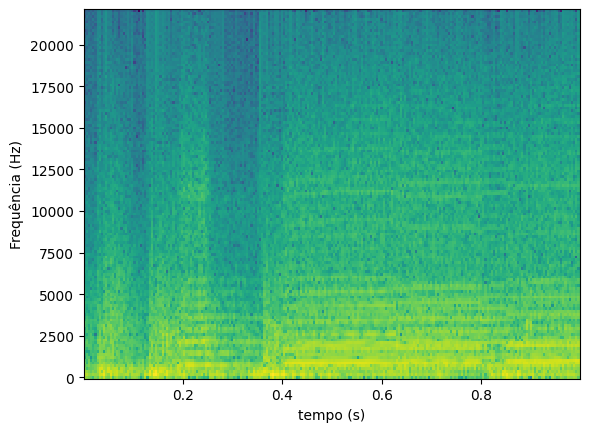

In [ ]:
freq,tempo,potencia = signal.spectrogram(sinal_audio_norm,Fs,'hamming',256,64)
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()

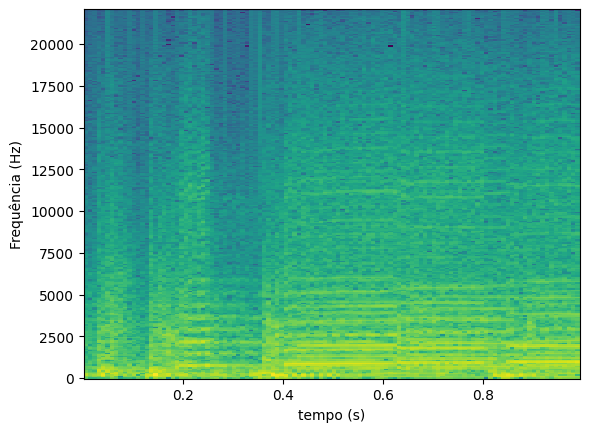

In [ ]:
freq,tempo,potencia = signal.spectrogram(sinal_audio_norm,Fs,'hamming',512,128)
max_pot = np.max(potencia)
pot_norm = potencia/max_pot
potencia_dB = 10*np.log10(potencia)
plt.pcolormesh(tempo,freq,potencia_dB)
plt.xlabel('tempo (s)'), plt.ylabel('Frequência (Hz)')
plt.show()